In [1]:
%run util.py

/Users/choiyoungrok/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [175]:
#-*- coding: utf-8 -*-
from konlpy.utils import pprint
from konlpy.tag import *
import datetime
import time
import csv
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import seaborn as sns
import dateutil
import random

from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics

In [3]:
# set to show all text in the cell
pd.set_option('display.max_colwidth', -1)

In [4]:
# 한글 표시
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="/Library/Fonts/NanumGothic.ttf").get_name()
rc('font', family=font_name)

In [5]:
# file path
PATH = '../dataset/physiogel.csv'
df0 = pd.read_csv(PATH)
df00 = df0.dropna(subset=['text'])
temp = [x.strip().decode('utf-8') for x in df00['text'].values] # erase back and foward spaces/ decoding to unicode 
df = pd.DataFrame(data=temp, index=df00['uid'], columns=['text'])
df

text
uid                                                                                                                                                                                                                                                                                                  
28618460  매번 사용하는 제품인데 저렴하게 잘 삿습니당                                                                                                                                                                                                                                                                   
28608506  몇 년째 쓰는 제품이예요~\n다른 기초화장품 없이 피지오겔크링과 선크림으로\n피부가 좋아졌 어요~~ 여름이면 항상 얼굴이  따끔거렸는데 \n그것도 다 없어지고~  암튼 전 화장품은 이거 하나만발라요~\n자극도 없고 완전 좋은 제품입니다~~                                                                                                                                                      
28584972  조금 기름진느낌이 없지않아있어요                                                                                                                                                                                                                                                                          
28584914  가격부담이 되도 계속 쓰고 있는 피지오겔 크림\n귀찮을때 이거 하나만 바르고 자도 다음날 화장 잘먹고 얼굴에서 광나요\n전 밤엔 듬뿍 아침엔 적당량만 발라요(집순이일땐 듬뿍)\n건성 민감성 피부에 좋아요 무향에 자극없고 보습력 좋아요\n로켓배송 덕분에 빠르게 쓸 수 있어서 좋았어요                                                                                                                              
28581673  촉촉해서 수분크림대신바르는데 좋아요                                                                                                                                                                                                                                                                        
28567308  배송빨라 좋네요                                                                                                                                                                                                                                                                                   
28542147  1. 배송 : 로켓 아니어도 괜찬은데, 다음날 바로 도착헸네요. 배송기사님 감사합니다.\n2. 제품 : 피지오겔 크림 똑같은 것으로 또 주문해서 사용합니다. 저는 민감피부라 무향을 선호해서 무향이라 좋고, 사계절 내내 사용하기 무리없구요. 여름엔 생각보단 덜 번들거리고, 겨울엔 저녁에 바르면 아침까지 건조함이 없어 좋습니다. 주문하면서 사용기한 내심 걱정했는데, 이번에도 안심이네요. (제가 사용하는 기간까지 넉넉해요-유통기한이 내년5월?6월까지인것 같았어요. 제품받고 며칠지난터라 정확한 기억이 안남.)
28465156  피지오겔~7년째사용중~~                                                                                                                                                                                                                                                                              
28463679  항상 쓰던 제품입니다 좋아요~~                                                                                                                                                                                                                                                                          
28454963  배송도 빠르고 좋으네영                                                                                                                                                                                                                                                                               
28418125  좋네요                                                                                                                                                                                                                                                                                        
28397315  바르고 30분이 지나서 얼굴을 보니 빨갛더라구요 너무 놀래서 씻고나서 리뷰를 보는데 참... 건성분들은 모르겠지만 중성 지성 분들은 사지마세요 저는 겨을에 바디로션 대신 바를려구요..^^                                                                                                                                                                                   
28371541  보습은 완전 잘돼요! 촉촉한 느낌이고 유분기는 거의 없어요                                                                                                                                   

In [6]:
df.shape

(3072, 1)

In [7]:
pprint(df['text'].values[0])

매번 사용하는 제품인데 저렴하게 잘 삿습니당


In [8]:
corpus = df.text.values
corpus.shape

(3072,)

# 형태소 분석

In [9]:
twitter = Twitter()

In [10]:
def nav_tokenizer(corpus):
    pos = twitter.pos(corpus)
    res = [x[0] for x in pos if (x[1] == u'Noun' or x[1] == u'Adjective' or x[1] == u'Verb')]
    return res

In [11]:
vect0 = TfidfVectorizer(tokenizer=twitter.nouns)
vect1 = TfidfVectorizer(tokenizer=nav_tokenizer)
vect2 = TfidfVectorizer(tokenizer=twitter.pos)

In [12]:
vect0.fit(corpus)
vect1.fit(corpus)
vect2.fit(corpus)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method Twitter.pos of <konlpy.tag._twitter.Twitter instance at 0x11a2cdbd8>>,
        use_idf=True, vocabulary=None)

In [13]:
print("token nouns: %d" % len(vect0.vocabulary_))
print("token n/a/v: %d" % len(vect1.vocabulary_))
print("token pos: %d" % len(vect2.vocabulary_))

token nouns: 2805
token n/a/v: 4799
token pos: 5862


* Corpus Encoding

In [14]:
v0 = vect0.transform(corpus).toarray()
v1 = vect1.transform(corpus).toarray()
v2 = vect2.transform(corpus).toarray()

<br>
### K-means++

* Elbow Method for K-means

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20

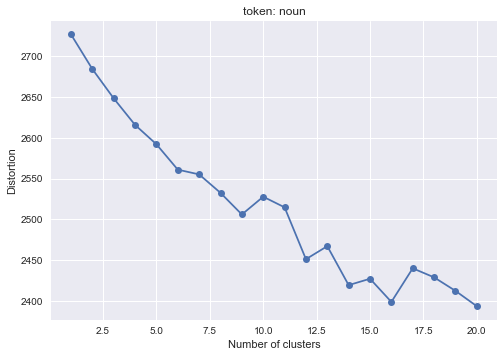

In [33]:
distortions = []
for i in range(1, 21):
    print i,
    km0 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, tol=0.0001)
    km0.fit(v0)
    distortions.append(km0.inertia_)
    
plt.plot(range(1,21), distortions, marker='o')
plt.title('token: noun')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20

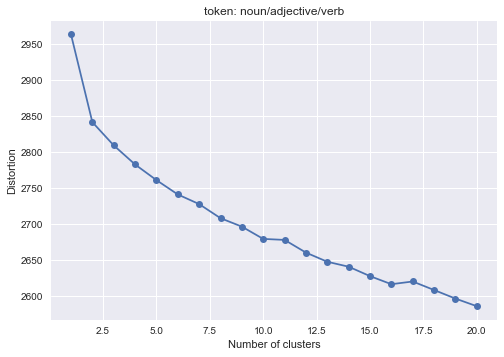

In [44]:
distortions = []
for i in range(1, 21):
    print i,
    km1 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, tol=0.0001)
    km1.fit(v1)
    distortions.append(km1.inertia_)
    
plt.plot(range(1,21), distortions, marker='o')
plt.title('token: noun/adjective/verb')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20

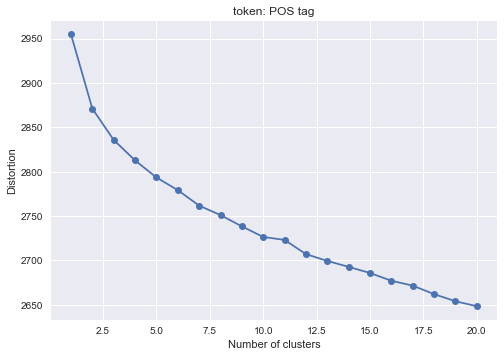

In [47]:
distortions = []
for i in range(1, 21):
    print i,
    km2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, tol=0.0001)
    km2.fit(v2)
    distortions.append(km2.inertia_)
    
plt.plot(range(1,21), distortions, marker='o')
plt.title('token: POS tag')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

* K-means (n=2)

In [48]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, tol=0.0001)
km.fit(v1)
print("Silhouette Coefficient: %0.3f" % silhouette_score(v1, km.labels_))

Silhouette Coefficient: 0.025


In [54]:
dfRes = pd.DataFrame(df.index.values, columns=['uid'])
dfRes['label'] = km.labels_
for i in range(2):
    print('label{}: {}'.format(i, len(dfRes[dfRes.label == i])))

label0: 155
label1: 2917


In [57]:
term = np.array(vect1.get_feature_names())
t = []
km.cluster_centers_.argsort()[0]

for i in range(2):
    t.append(term[km.cluster_centers_.argsort()[i]].tolist())
    pprint(t[i][:10])

[것,
 잘,
 아이,
 계속,
 얼굴,
 아기,
 저렴,
 괜찮,
 촉촉해,
 로켓]
[끌함,
 큰일,
 허루,
 툭,
 쳤,
 처음처럼,
 느껴졌,
 비슷합,
 시작하네,
 이주]


<br>
### Affinity Propagation

In [222]:
model = AffinityPropagation(damping=0.7, preference=5).fit(v1)

In [223]:
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(v1, labels, metric='sqeuclidean'))

Estimated number of clusters: 3072


ValueError: Number of labels is 3072. Valid values are 2 to n_samples - 1 (inclusive)

<br>
### Hierachical Clustering(ward)

In [190]:
row_clusters = linkage(v1, method='ward', metric='euclidean')

In [18]:
dfRes = pd.DataFrame(row_clusters,
                    columns=['row label1', 'row label2', 'distance', 'no.of items in clust.'])
dfRes

row labe1  row label2   distance  no.of items in clust.
0     620.0      1976.0      0.000000   2.0                  
1     2109.0     3072.0      0.000000   3.0                  
2     2220.0     3073.0      0.000000   4.0                  
3     2381.0     3074.0      0.000000   5.0                  
4     2425.0     3075.0      0.000000   6.0                  
5     2756.0     3076.0      0.000000   7.0                  
6     2772.0     3077.0      0.000000   8.0                  
7     2962.0     3078.0      0.000000   9.0                  
8     3013.0     3079.0      0.000000   10.0                 
9     2219.0     2459.0      0.000000   2.0                  
10    803.0      2002.0      0.000000   2.0                  
11    107.0      552.0       0.000000   2.0                  
12    1203.0     3083.0      0.000000   3.0                  
13    1667.0     3084.0      0.000000   4.0                  
14    1845.0     3085.0      0.000000   5.0                  
15    1995.0     3086.0      0.000000   6.0                  
16    2329.0     3087.0      0.000000   7.0                  
17    2706.0     3088.0      0.000000   8.0                  
18    2014.0     2719.0      0.000000   2.0                  
19    783.0      842.0       0.000000   2.0                  
20    1374.0     3091.0      0.000000   3.0                  
21    2078.0     3092.0      0.000000   4.0                  
22    2718.0     3093.0      0.000000   5.0                  
23    2921.0     3094.0      0.000000   6.0                  
24    10.0       13.0        0.000000   2.0                  
25    20.0       3096.0      0.000000   3.0                  
26    62.0       3097.0      0.000000   4.0                  
27    72.0       3098.0      0.000000   5.0                  
28    76.0       3099.0      0.000000   6.0                  
29    112.0      3100.0      0.000000   7.0                  
...     ...         ...           ...   ...                  
3041  5768.0     6110.0      3.223197   1791.0               
3042  6111.0     6113.0      3.298934   1999.0               
3043  3999.0     6094.0      3.304168   26.0                 
3044  6065.0     6112.0      3.317477   240.0                
3045  6109.0     6114.0      3.417340   2047.0               
3046  6045.0     6117.0      3.504306   2075.0               
3047  6051.0     6116.0      3.505611   263.0                
3048  6115.0     6118.0      3.587975   2101.0               
3049  6053.0     6061.0      3.743531   66.0                 
3050  5197.0     6119.0      3.801293   274.0                
3051  6100.0     6120.0      3.858573   2195.0               
3052  5848.0     6122.0      3.888391   288.0                
3053  5989.0     6017.0      3.904059   59.0                 
3054  5586.0     6123.0      3.916743   2210.0               
3055  3687.0     5972.0      3.954505   36.0                 
3056  3867.0     5129.0      4.136859   26.0                 
3057  6124.0     6125.0      4.213523   347.0                
3058  5995.0     6121.0      4.434172   90.0                 
3059  5487.0     6128.0      4.528722   42.0                 
3060  5682.0     6099.0      4.534628   110.0                
3061  5795.0     6129.0      4.783144   371.0                
3062  6048.0     6132.0      4.820372   134.0                
3063  5816.0     6131.0      5.058395   59.0                 
3064  6126.0     6135.0      5.291222   2269.0               
3065  6127.0     6134.0      5.326412   170.0                
3066  6130.0     6133.0      5.376382   461.0                
3067  6136.0     6138.0      5.674029   2730.0               
3068  6137.0     6139.0      6.150554   2900.0               
3069  5900.0     6140.0      6.248060   2928.0               
3070  3238.0     6141.0      15.594550  3072.0               

[3071 rows x 4 columns]

/Users/choiyoungrok/anaconda/lib/python2.7/site-packages/matplotlib/mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/Users/choiyoungrok/anaconda/lib/python2.7/site-packages/matplotlib/mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


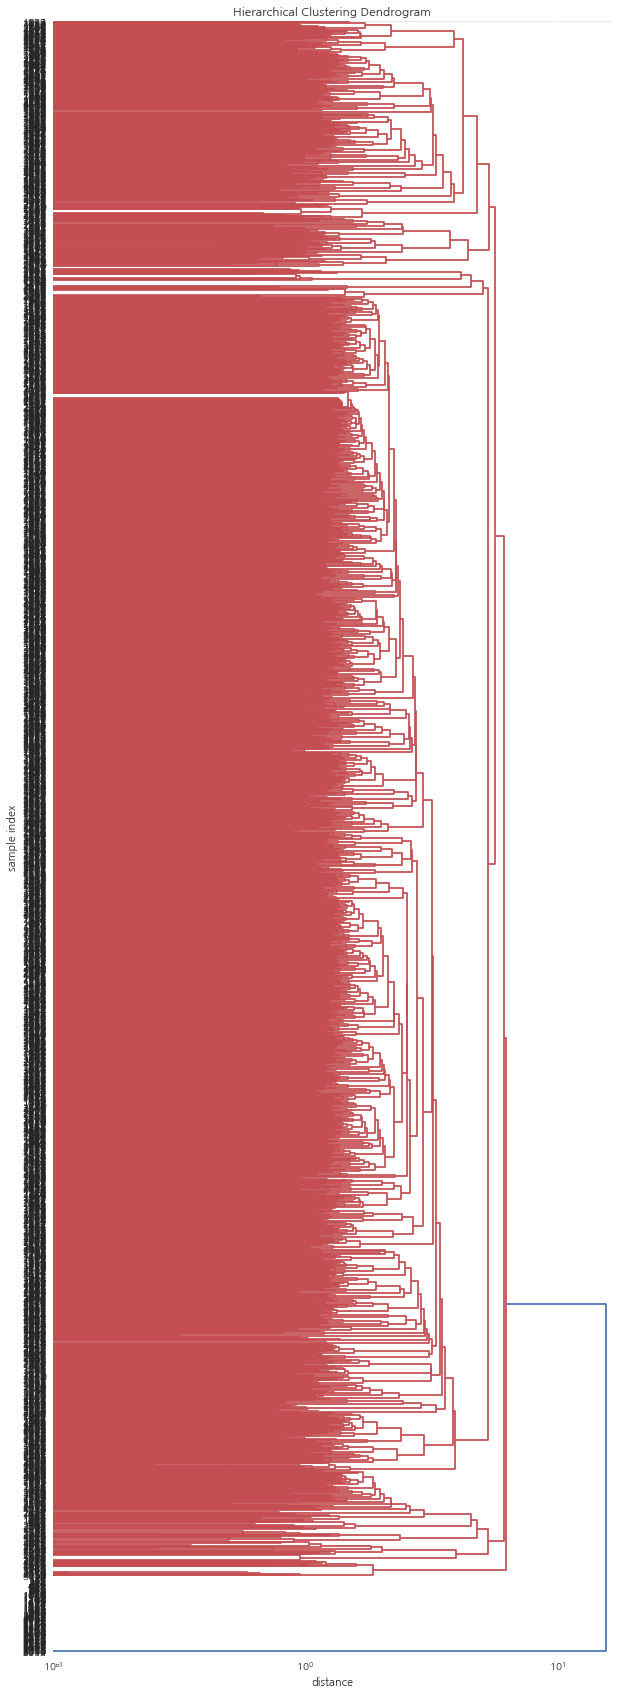

In [24]:
plt.figure(figsize=(10,30))
ax = plt.subplot(111)
dendrogram(row_clusters, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')
ax.set_xlim(xmin=0.1)
ax.set_xscale('log')
plt.show()

* Result (distance=7)

In [32]:
distance = 7
clusters = fcluster(row_clusters, distance, 'distance')
dfRes = pd.DataFrame(corpus, columns=['text'])
dfRes['label'] = clusters
for i in range(len(dfRes.label.unique())):
    print('label {}: {}'.format(i+1, len(dfRes.loc[dfRes['label'] == i+1])))

label 1: 144
label 2: 2928


In [26]:
repr_all(dfRes.loc[dfRes['label'] == 1])

text  label
10    좋네요                      1    
13    좋습니다                     1    
20    좋아요                      1    
62    좋아요                      1    
72    좋아요~~^^                  1    
76    좋아요                      1    
112   좋아요                      1    
145   좋습니다                     1    
215   좋앙ㅍ                      1    
242   좋아요                      1    
251   좋네요                      1    
291   좋아요~^^                   1    
311   좋네요~~                    1    
338   좋아요                      1    
339   좋아요                      1    
364   좋습니다                     1    
365   좋습니다                     1    
389   좋아요                      1    
428   좋네요                      1    
487   좋아요~                     1    
515   좋아요                      1    
528   좋아요~~~                   1    
565   좋아요~                     1    
575   좋아요                      1    
617   좋아요                      1    
648   좋아요                      1    
663   좋아요                      1    
670   좋아요~~                    1    
697   좋음                       1    
720   좋아요~                     1    
734   좋아요                      1    
766   좋아요                      1    
778   좋아요 좋아요 좋아요 좋아요 좋아요 좋아요  1    
870   좋아요                      1    
958   좋아요~~~~~                 1    
1024  좋아요                      1    
1086  좋아요                      1    
1115  좋아요                      1    
1155  좋아요                      1    
1160  좋아요                      1    
1207  좋아요                      1    
1210  좋아요                      1    
1229  좋아요ㅋ                     1    
1241  좋아요                      1    
1266  좋아요^^                    1    
1304  좋아요                      1    
1373  좋아요                      1    
1390  좋아용~~                    1    
1459  좋아요^^                    1    
1499  좋아요                      1    
1513  좋아요~~~~                  1    
1514  좋아요!!                    1    
1534  좋아요                      1    
1582  좋아요                      1    
1584  좋아요                      1    
1612  좋네요                      1    
1637  좋아요                      1    
1688  좋아요                      1    
1711  좋아요                      1    
1725  좋아요!                     1    
1737  좋아요.                     1    
1880  좋아요~                     1    
1892  좋아요^^                    1    
1908  좋아요                      1    
1932  좋아요                      1    
1938  좋아요                      1    
1945  좋아요~                     1    
1949  좋아요^^*                   1    
1958  좋네ㅛ                      1    
1961  좋아요ㅎ                     1    
1970  좋습니다~~~~                 1    
1992  좋네요                      1    
2005  좋아요                      1    
2017  좋아요                      1    
2019  좋아요                      1    
2022  좋아요                      1    
2059  좋아요                      1    
2066  좋아요                      1    
2072  좋아요                      1    
2077  좋아용,                     1    
2094  좋아요^^                    1    
2099  좋습니다                     1    
2102  좋아요                      1    
2104  좋아요                      1    
2112  좋아요                      1    
2129  좋아요                      1    
2135  좋아요                      1    
2136  좋습니다.                    1    
2203  좋아요                      1    
2266  좋아요                      1    
2277  좋아요                      1    
2279  좋아요                      1    
2298  좋아여!!                    1    
2299  좋네요                      1    
2305  좋아요~^^                   1    
2307  좋아요                      1    
2327  좋아요                      1    
2345  좋아용                      1    
2347  좋아요                      1    
2365  좋아요                      1    
2366  좋아요                      1    
2369  좋아요~                     1    
2379  좋아요                      1    
2390  좋아요                      1    
2401  좋아요                      1    
2404  좋습니다^^                   1    
2408  좋아요                      1    
2420  좋아용                    

'144 rows printed'

In [27]:
temp_cor = dfRes.loc[dfRes['label'] == 1].text.values
temp_vec = CountVectorizer(tokenizer=nav_tokenizer)
temp_vec.fit(temp_cor)
pprint(temp_vec.vocabulary_)

{좋: 0}


* Result (distance=5.1)

In [200]:
distance = 5.1
clusters = fcluster(row_clusters, distance, 'distance')
dfRes = pd.DataFrame(corpus, columns=['text'])
dfRes['label'] = clusters
for i in range(len(dfRes.label.unique())):
    print('label {}: {}'.format(i+1, len(dfRes.loc[dfRes['label'] == i+1])))

label 1: 144
label 2: 28
label 3: 36
label 4: 134
label 5: 2210
label 6: 59
label 7: 90
label 8: 371


In [29]:
repr_all(dfRes.loc[dfRes['label'] == 2])

text  \
191   항상굿                                                                       
495   배송, 상품 모두 굿~~~^^                                                          
538   항상 좋은제품이란 생각이들어요\n배송굿                                                     
619   쓰던대로 굿                                                                    
787   굿                                                                         
828   굿 이게 젤좋아 수분은..                                                            
1011  굿                                                                         
1013  굿                                                                         
1055  좋네요~ 굿!                                                                   
1133  굿                                                                         
1359  촉촉함은 굿~\n아토피아가들한테 그나마 젤 잘맞아요                                              
1605  빠른배송.굿                                                                    
1982  굿                                                                         
2139  굿                                                                         
2160  굿                                                                         
2270  좋아요\n\n굿\n굿\n굿\n굿                                                         
2320  굿 좋음                                                                      
2354  배송도 빠르고 상품도 굿이에여                                                          
2385  배송굿 상품 굿에요 ^^                                                             
2416  굿                                                                         
2453  가격도  마니싸고  배송도  엄청 좋네요  ㅎㅎ  \n제품은  처음써봣는데 보름력이  오래가고  좋아요  ㅎㅎㅎ\n\n굿 굿 굿   
2670  굿                                                                         
2678  굿                                                                         
2721  저렴한 가격굿 빠른배송 역시 굿                                                         
2783  배송굿                                                                       
2845  굿!!!!                                                                     
2974  배송도 빠르고 포장도 굿                                                             
3016  아기피부에 굿                                                                   

      label  
191   2      
495   2      
538   2      
619   2      
787   2      
828   2      
1011  2      
1013  2      
1055  2      
1133  2      
1359  2      
1605  2      
1982  2      
2139  2      
2160  2      
2270  2      
2320  2      
2354  2      
2385  2      
2416  2      
2453  2      
2670  2      
2678  2      
2721  2      
2783  2      
2845  2      
2974  2      
3016  2

'28 rows printed'

In [247]:
temp_cor = dfRes.loc[dfRes['label'] == 2].text.values
temp_vec = CountVectorizer(tokenizer=nav_tokenizer)
temp_vec.fit(temp_cor)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function nav_tokenizer at 0x119786de8>, vocabulary=None)

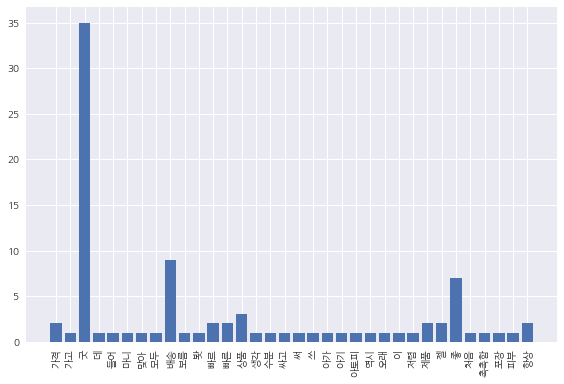

In [245]:
count = temp_vec.transform(temp_cor).toarray().sum(axis=0)

fig, ax = plt.subplots()
plt.bar(range(len(count)), count, align='center')
plt.xticks(temp_vec.vocabulary_.values(), temp_vec.vocabulary_.keys())
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [158]:
repr_all(dfRes.loc[dfRes['label'] == 3])

text  label
48    보습력이 좋습니다                          3    
57    항상 쓰는 피지오겔~ 보습력 짱입니다!!             3    
66    보습력 좋네요.                           3    
235   아기랑 같이 쓰고있어요순한거 보습 짱입니다            3    
259   보습력이 짱 좋아요                         3    
308   보습력좋내요!!!                          3    
504   역시 피지오겔이 짱입니다요^^                   3    
505   피지오겔 보습력짱                          3    
598   피지오겔 짱짱                            3    
742   우리아이 아토피피부에\n좋아요  ㅎㅎ\n보습력 짱\n배송 짱  3    
783   보습력 짱                              3    
792   보습력  짱입니다!                         3    
837   보습이 좋아요                            3    
842   보습력 짱                              3    
979   보습에 좋음                             3    
1374  보습력짱~^^                            3    
1414  피지오겔 보습력 짱 좋아요                     3    
1654  보습좋아요                              3    
1792  보습짱                                3    
1820  보습력짱입니다,건조한분들 사용추천드려요~~^^          3    
2078  보습 짱!!                             3    
2295  항상쓰던거라 보습 짱 입니다                    3    
2407  역시 피지오겔이지말입니다 ㅎㅎ 짱추천입니다            3    
2471  보습짱                                3    
2517  보습이 좋아요                            3    
2695  완저 보습 짱입니다.                        3    
2696  보습 좋네요                             3    
2718  보습력 짱이예요~                          3    
2744  보습력이 좋아요.                          3    
2753  보습력 좋아요                            3    
2785  쌀쌀한 날씨에 보습력 짱!                     3    
2790  피지오겔 짱!                            3    
2818  피지오겔이짱                             3    
2921  보습력짱..                             3    
2943  짱좋음                                3    
2992  보습으론 짱짱짱                           3

'36 rows printed'

In [253]:
temp_cor = dfRes.loc[dfRes['label'] == 3].text.values
temp_vec = CountVectorizer(tokenizer=nav_tokenizer)
temp_vec.fit(temp_cor)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function nav_tokenizer at 0x119786de8>, vocabulary=None)

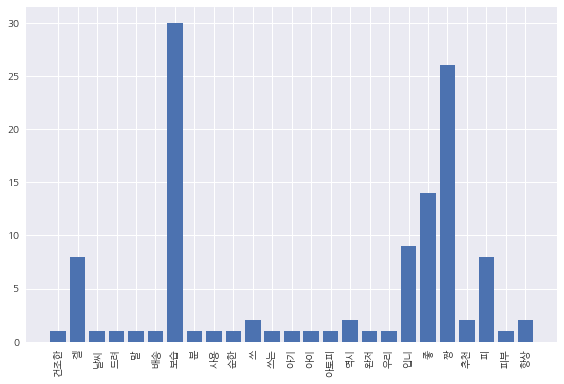

In [254]:
count = temp_vec.transform(temp_cor).toarray().sum(axis=0)

fig, ax = plt.subplots()
plt.bar(range(len(count)), count, align='center')
plt.xticks(temp_vec.vocabulary_.values(), temp_vec.vocabulary_.keys())
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [30]:
repr_all(dfRes.loc[dfRes['label'] == 4])

text  \
7     피지오겔~7년째사용중~~                                                                                                                                                                                                                         
27    피지오겔 크림은 몇년째 사용중이에요~\n예민한 남매 피부에 잘맞아요~\n끈적임없이 촉촉해요\n향도 거부감없이  무향에 가까운듯해요\n몇년째 꾸준히 잘 쓰고있어요~^^                                                                                                                                          
35    역시 피지오겔                                                                                                                                                                                                                               
46    피지오겔아시잖아요 ㅎㅎㅎ 개좋음..                                                                                                                                                                                                                   
54    보습엔 정말 최고                                                                                                                                                                                                                             
67    최고입니다.\n\n저한테는 피지오겔만한게 없네요.\n\n로켓배송으로 사니까 가격도 저렴하고\n\n최고입니다. 완전 추천이요!                                                                                                                                                                 
89    피지오겔 좋아요                                                                                                                                                                                                                              
98    갑자기 아토피가 생겨서 급하게 쿠팡에서 샀어요~\n한통도 다 쓰기번에 원래피부로 다시 돌아왔어요!!\n어쩜 참 신기한 물건입니다~~                                                                                                                                                             
114   역시피지오겔!! 적극추천 신생아애기들이발라도 부작용없는 피지오겔♡♡                                                                                                                                                                                                 
151   아기피부뒤집어졌는데 일주일사용하고 다시 좋아졌어요ㅎㅎ\n역시 피지오겔♡♡                                                                                                                                                                                              
152   역시피지오겔이답입니다                                                                                                                                                                                                                           
161   믿고쓰는 피지오겔\n믿고사는 쿠팡임니당\n빠른배송 최고네요                                                                                                                                                                                                      
162   촉촉하고 순하고 남녀노소 누구나 쓰는피지오겔                                                                                                                                                                                                              
163   피지오겔 크림은 진리!                                                                                                                                                                                                                          
165   악성건조엔  피지오겔이 최고에요\n사계절 피지오겔만 쓰고있어요 최고! 최고!                                                                                                                                                                                            
197   최고입니다                                                                                                                                                                                                                                 
213   역시 좋습니다^^                                                                                                                                                                                         

'134 rows printed'

In [62]:
temp_cor = dfRes.loc[dfRes['label'] == 4].text.values
temp_vec = CountVectorizer(tokenizer=nav_tokenizer)
temp_vec.fit(temp_cor)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function nav_tokenizer at 0x10f4cae60>, vocabulary=None)

In [64]:
temp = pd.DataFrame(temp_vec.vocabulary_.keys(), columns=['word'])
temp['num'] = temp_vec.vocabulary_.values()
temp.sort_values(by='num', inplace=True)
temp['count'] = temp_vec.transform(temp_cor).toarray().sum(axis=0)
temp = temp.loc[temp['count'] > 3]

[겔,
 피,
 좋,
 피부,
 역시,
 쓰,
 보습,
 최고,
 쓰는,
 지오]


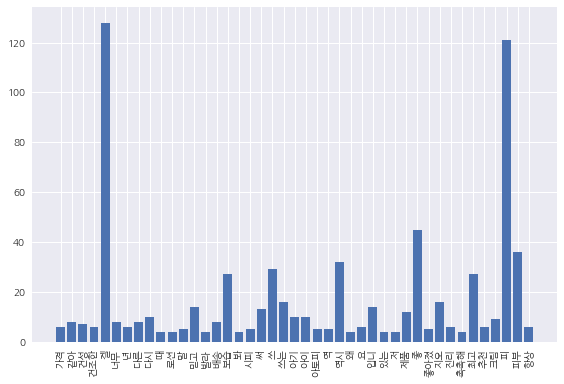

In [65]:
fig, ax = plt.subplots()
plt.bar(range(len(temp)), temp['count'].values, align='center')
plt.xticks([x for x in range(len(temp))], temp['word'].values)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
pprint(temp.sort_values(by='count', ascending=False)['word'].values[:10].tolist())
plt.tight_layout()
plt.show()

In [201]:
repr_all(dfRes.loc[dfRes['label'] == 6])

text  label
64    촉촉하고 좋습니다^^               6    
115   ㆍ늘쓰던거에요...촉촉하니좋아요         6    
199   좋아요 너무좋아요                 6    
212   촉촉하니 좋으네요                 6    
254   배송빠르고 촉촉하니 좋아요            6    
287   조아용                       6    
502   족족해서조아용^&                 6    
529   조아용!!!!                   6    
531   촉촉하니 좋아요 ^^               6    
657   상품 촉촉하니  좋아요~~            6    
680   촉촉하고\n좋아요                 6    
723   조야요                       6    
770   조아요                       6    
782   촉촉하고 좋아요                  6    
859   촉촉하고 좋네요. ^^              6    
863   촉촉하니 너무좋아요~               6    
912   로션이 촉촉하니 좋아요 배송도빠르고요^^    6    
956   조아요                       6    
1034  촉촉히니조아요                   6    
1070  촉촉하니 조아요 굿                6    
1072  촉촉하니 조아요 굿                6    
1136  촉촉하고 보습좋아요                6    
1149  아기한테 너무 좋아요               6    
1206  촉촉하고 좋아요                  6    
1250  촉촉하고 좋아요^^                6    
1294  촉촉하니 괜찮아요~^^              6    
1339  조아요                       6    
1370  촉촉하고 좋아요:-)               6    
1425  너무 좋아용                    6    
1447  촉촉하니 좋아용~~                6    
1454  촉촉하고좋아요!!                 6    
1616  촉촉하고 너무 좋아요^^             6    
1782  너무좋아요                     6    
1906  조아여                       6    
2044  보습력 죽여줌니다\n신생아에게 너무조아요    6    
2073  조아요♡                      6    
2076  촉촉하고 좋아요                  6    
2091  보습력조아요                    6    
2161  너무너무좋음\n딱…좋음              6    
2179  수분이~너무좋으네요~^^             6    
2247  너무 좋아요!                   6    
2317  촉촉하고 너무좋아요 보습짱            6    
2398  너무좋아요                     6    
2431  촉촉하고 좋아요                  6    
2588  보습짱 너무좋아요                 6    
2593  조아여                       6    
2693  너무좋아요~~^^                 6    
2722  촉촉하니 좋아요ㅎ                 6    
2725  너무너무 좋아요 보습이 너무 좋은듯해요/    6    
2763  조아요 조아요                   6    
2768  건성들에게 최고 촉촉하니 좋습니다        6    
2771  아기랑 저랑 같이사용하는데 촉촉하니..좋아요  6    
2795  촉촉하니 좋아요~^^               6    
2830  촉촉하고 너무좋아요...             6    
2958  좋아요...촉촉하고~               6    
2977  촉촉하고좋아요                   6    
3009  촉촉하니 조아요                  6    
3026  너무 좋아요                    6    
3068  촉촉하니 좋습니다                 6

'59 rows printed'

In [203]:
temp_cor = dfRes.loc[dfRes['label'] == 6].text.values
temp_vec = CountVectorizer(tokenizer=nav_tokenizer)
temp_vec.fit(temp_cor)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function nav_tokenizer at 0x11a2ed050>, vocabulary=None)

In [204]:
temp = pd.DataFrame(temp_vec.vocabulary_.keys(), columns=['word'])
temp['num'] = temp_vec.vocabulary_.values()
temp.sort_values(by='num', inplace=True)
temp['count'] = temp_vec.transform(temp_cor).toarray().sum(axis=0)

[좋,
 너무,
 조,
 촉촉하니,
 촉촉하고,
 보습,
 굿,
 배송,
 빠르,
 아기]


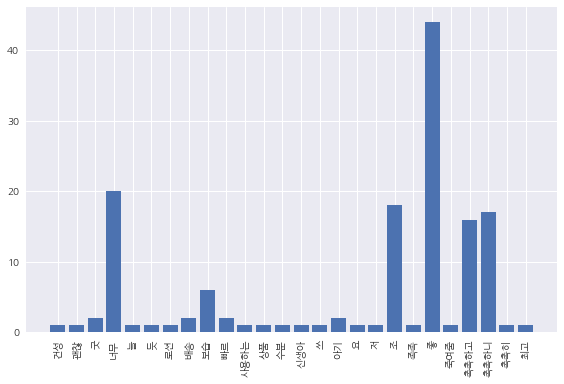

In [206]:
fig, ax = plt.subplots()
plt.bar(range(len(temp)), temp['count'].values, align='center')
plt.xticks([x for x in range(len(temp))], temp['word'].values)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
pprint(temp.sort_values(by='count', ascending=False)['word'].values[:10].tolist())
plt.show()

In [207]:
repr_all(dfRes.loc[dfRes['label'] == 7])

text  \
8     항상 쓰던 제품입니다 좋아요~~                                                                                                       
25    넘 잘 쓰고 있어요 감사합니다                                                                                                        
29    늘 쓰던거라 믿고 구매합니다                                                                                                         
81    늘쓰던거.ㅎ                                                                                                                  
100   좋아요항상이제품만써요~                                                                                                            
113   피지오겔 아주 잘쓰고있어요!!!!!!!!!!!\n보습려고 최고고 항상 쓰던거 구매해서 잘쓰고있습니다 ㅎㅎ                                                              
132   보습력 좋아요 꾸준히 쓰려고요                                                                                                        
137   꾸준히쓰고있어요                                                                                                                
193   항상 쓰던 제품이라 좋아요                                                                                                          
300   피지오겔은 항상 좋음                                                                                                             
352   애들아빠가 이것만 쓰거던요 이것 쓰고 나서 다른건 못쓰겠다고..계속 쭉~~쓸거예요                                                                           
356   잘쓰고있습니다                                                                                                                 
369   늘 쓰고있는 제품입니다. 신랑이 손이 심하게 건조해서 여러가지 제품을 써봤는데 피지오겔이 가장 효과가 좋았어요. 휴대하기 간편한 사이즈입니다. 배송도 빠르고 좋았어요~~                          
392   항상쓰는 피지오겔 크림 ㅎㅎ 좋아요                                                                                                     
410   항상 잘쓰고 있어요                                                                                                              
476   다른 화장품 안쓰고 있어요 보습 좋아요                                                                                                   
558   늘 쓰는 제품이에요\n수분크림으로 써요                                                                                                   
599   항상 쓰던 제품이라 이번에도 역시 만족하고 쓰고 있어요~~                                                                                        
661   이거 쓰고 나서 다른 로션 못쓰겠어요 간편하게 쭉짜서 쓰고 아무데나 들고다니기도 좋고 보습력도오래가요                                                                
752   잘 쓰고 있어요. 용량도 많아서 만족합니다.                                                                                                
803   항상 쓰는 제품                                                                                                                
821   항상 잘 쓰고 있어요~~                                                                                                           
831   늘 사용하던 제품입니다. 좋아요                                                                                                       
895   항상쓰는 크림                                                                                                                 
900   항상쓰고 있습니다 좋아요 ^^                                                                                                        
922   언제나 밑고쓰는 피지오겔 항상 만족합니다                                                                                                  
926   항상쓰는상품                                                                                                                  
933   아이들 겨울에는 항상 사용하는 제품\n항상 만족하는 제품\n좋아요~~                                                                                  
968   잘 쓰고 있습니다                                                                                                               
1015  잘쓰고있어요                                                                                                                  
1049  항상쓰던제품...                                                                                                               
1075  항상 만족하고 쓰는 제품이예요\n아이얼굴에 쓰고 있어요\n촉촉하고 조아요         

'90 rows printed'

In [209]:
temp_cor = dfRes.loc[dfRes['label'] == 7].text.values
temp_vec = CountVectorizer(tokenizer=nav_tokenizer)
temp_vec.fit(temp_cor)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function nav_tokenizer at 0x11a2ed050>, vocabulary=None)

In [212]:
temp = pd.DataFrame(temp_vec.vocabulary_.keys(), columns=['word'])
temp['num'] = temp_vec.vocabulary_.values()
temp.sort_values(by='num', inplace=True)
temp['count'] = temp_vec.transform(temp_cor).toarray().sum(axis=0)
temp = temp.loc[temp['count'] > 2]

[쓰,
 좋,
 제품,
 항상,
 늘,
 쓰는,
 겔,
 피,
 있어,
 잘]


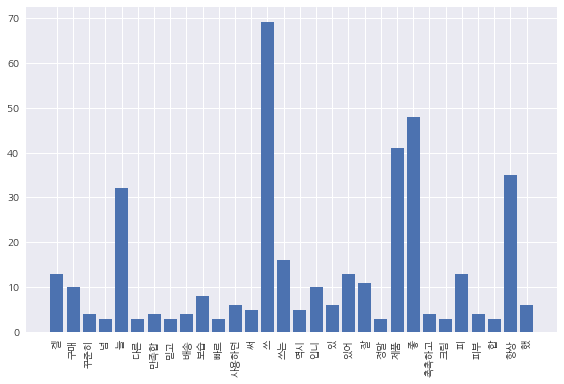

In [213]:
fig, ax = plt.subplots()
plt.bar(range(len(temp)), temp['count'].values, align='center')
plt.xticks([x for x in range(len(temp))], temp['word'].values)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
pprint(temp.sort_values(by='count', ascending=False)['word'].values[:10].tolist())
plt.show()

In [214]:
repr_all(dfRes.loc[dfRes['label'] == 8])

text  \
5     배송빨라 좋네요                                                                                                                                                                                                                                                                                                                       
9     배송도 빠르고 좋으네영                                                                                                                                                                                                                                                                                                                   
17    상품 배송 만족합니다                                                                                                                                                                                                                                                                                                                    
23    잘받았습니다 좋은상풒                                                                                                                                                                                                                                                                                                                    
24    늘 쓰는 제품이에요. 쿠팡에서 저렴하게 잘 구입했어요.                                                                                                                                                                                                                                                                                                 
43    지인 추천으로 쓰게된 화장품이에용\n\n아직 몇 번 사용하지 않아 잘 모르지만\n\n지인에게 추천받았을 때 \n\n성분이 좋다해서 받았어용 \n\n그래서 그런지 발랐을 때 순한 느낌은 있어용!\n\n로켓배송이라 주문 다음날 받았어용 ㅎㅎ                                                                                                                                                                                           
68    괜찮아요~0                                                                                                                                                                                                                                                                                                                         
73    배송도 빠르고 가격도 저렴해오~                                                                                                                                                                                                                                                                                                              
84    저희아들들과함께씁니다~\n제일좋은것같아요~\n연령상관없이여~~                                                                                                                                                                                                                                                                                             
87    배송도 빠르고 좋아요. 이제껏 써본 크림 중에 보습은 피지오겔을 따라오는게 없는 듯 합니다.                                                                                                                                                                                                                                                                            
95    배송도 제품도 만족해요.                                                                                                                                                                                                                                                                                                                  
96    가격이 다른곳보다 저렴하네요                                                                                                                                                                                                                                                                                                                
107   배송도 빠르고 좋아요^^                                                             

'371 rows printed'

In [215]:
temp_cor = dfRes.loc[dfRes['label'] == 8].text.values
temp_vec = CountVectorizer(tokenizer=nav_tokenizer)
temp_vec.fit(temp_cor)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function nav_tokenizer at 0x11a2ed050>, vocabulary=None)

In [216]:
temp = pd.DataFrame(temp_vec.vocabulary_.keys(), columns=['word'])
temp['num'] = temp_vec.vocabulary_.values()
temp.sort_values(by='num', inplace=True)
temp['count'] = temp_vec.transform(temp_cor).toarray().sum(axis=0)
temp = temp.loc[temp['count'] > 13]

[배송,
 좋,
 저렴,
 가격,
 잘,
 쓰,
 빠르,
 하게,
 겔,
 피]


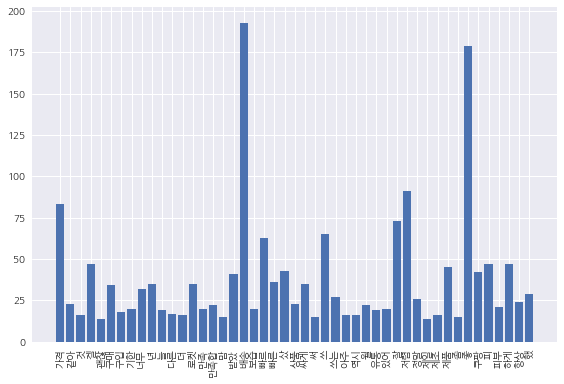

In [217]:
fig, ax = plt.subplots()
plt.bar(range(len(temp)), temp['count'].values, align='center')
plt.xticks([x for x in range(len(temp))], temp['word'].values)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
pprint(temp.sort_values(by='count', ascending=False)['word'].values[:10].tolist())
plt.show()

In [192]:
repr_all(dfRes.loc[dfRes['label'] == 5])

text  \
0     매번 사용하는 제품인데 저렴하게 잘 삿습니당                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1     몇 년째 쓰는 제품이예요~\n다른 기초화장품 없이 피지오겔크링과 선크림으로\n피부가 좋아졌 어요~~ 여름이면 항상 얼굴이  따끔거렸는데 \n그것도 다 없어지고~  암튼 전 화장품은 이거 하나만발라요~\n자극도 없고 완전 좋은 제품입니다~~                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
2     조금 기름진느낌이 없지않아있어요                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

'2210 rows printed'

In [193]:
temp_cor = dfRes.loc[dfRes['label'] == 5].text.values
temp_vec = CountVectorizer(tokenizer=nav_tokenizer)
temp_vec.fit(temp_cor)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function nav_tokenizer at 0x11a2ed050>, vocabulary=None)

In [196]:
temp = pd.DataFrame(temp_vec.vocabulary_.keys(), columns=['word'])
temp['num'] = temp_vec.vocabulary_.values()
temp.sort_values(by='num', inplace=True)
temp['count'] = temp_vec.transform(temp_cor).toarray().sum(axis=0)
temp = temp.loc[temp['count'] > 100]
len(temp)

52

[좋,
 피부,
 피,
 쓰,
 겔,
 크림,
 보습,
 제품,
 바르,
 써]


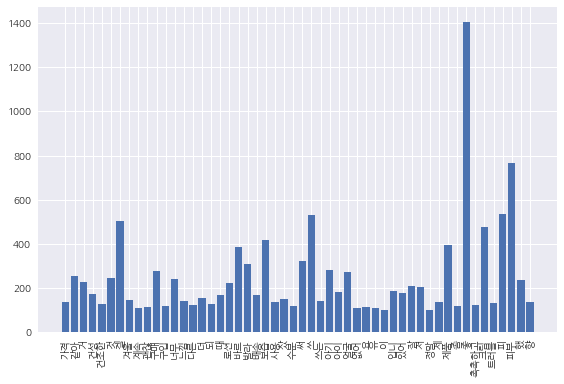

In [197]:
fig, ax = plt.subplots()
plt.bar(range(len(temp)), temp['count'].values, align='center')
plt.xticks([x for x in range(len(temp))], temp['word'].values)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
pprint(temp.sort_values(by='count', ascending=False)['word'].values[:10].tolist())
plt.show()

<br>
### DBSCAN
Density-based Spatial Clustering of Aplications with Noise

In [119]:
db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')

In [120]:
y = db.fit_predict(v1)

In [121]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(v1, db.labels_))

Estimated number of clusters: 6
Silhouette Coefficient: -0.203


In [122]:
dfRes = pd.DataFrame(corpus, columns=['text'])
dfRes['label'] = y

In [123]:
for i in range(len(dfRes.label.unique())):
    if i == 0 :
        print('noise-1: {}'.format(len(dfRes.loc[dfRes['label'] == i-1])))
    else:
        print('label {}: {}'.format(i-1, len(dfRes.loc[dfRes['label'] == i-1])))

noise-1: 2874
label 0: 144
label 1: 10
label 2: 12
label 3: 10
label 4: 10
label 5: 12


In [133]:
repr_all(dfRes.loc[dfRes['label'] == 1])

text  label
48    보습력이 좋습니다  1    
66    보습력 좋네요.   1    
308   보습력좋내요!!!  1    
837   보습이 좋아요    1    
979   보습에 좋음     1    
1654  보습좋아요      1    
2517  보습이 좋아요    1    
2696  보습 좋네요     1    
2744  보습력이 좋아요.  1    
2753  보습력 좋아요    1

'10 rows printed'

In [134]:
temp_cor = dfRes.loc[dfRes['label'] == 0].text.values
temp_vec = CountVectorizer(tokenizer=nav_tokenizer)
temp_vec.fit(temp_cor)
pprint(temp_vec.vocabulary_)

{좋: 0}


<br>
### HDBSCAN

In [135]:
import hdbscan

In [151]:
hdb = hdbscan.HDBSCAN(min_cluster_size=10)

In [152]:
y1 = hdb.fit_predict(v1)

In [153]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(hdb.labels_)) - (1 if -1 in hdb.labels_ else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(v1, hdb.labels_))

Estimated number of clusters: 32
Silhouette Coefficient: -0.027


In [156]:
dfRes = pd.DataFrame(corpus, columns=['text'])
dfRes['label'] = y1

In [157]:
for i in range(len(dfRes.label.unique())):
    if i == 0 :
        print('noise-1: {}'.format(len(dfRes.loc[dfRes['label'] == i-1])))
    else:
        print('label {}: {}'.format(i-1, len(dfRes.loc[dfRes['label'] == i-1])))

noise-1: 433
label 0: 57
label 1: 19
label 2: 1039
label 3: 21
label 4: 46
label 5: 22
label 6: 12
label 7: 47
label 8: 198
label 9: 22
label 10: 13
label 11: 49
label 12: 22
label 13: 12
label 14: 478
label 15: 21
label 16: 96
label 17: 19
label 18: 23
label 19: 82
label 20: 20
label 21: 32
label 22: 11
label 23: 27
label 24: 12
label 25: 25
label 26: 12
label 27: 144
label 28: 15
label 29: 13
label 30: 11
label 31: 19


In [158]:
repr_all(dfRes.loc[dfRes['label'] == 0])

text  \
1268  피부가 많이 건조해서 구매했는데 촉촉하고 오랜시간 지나도 유지가 되네요 부모님도 발라보시고 좋다고 하셔서 또 구매해서 드리려구요~~~~~                                                                                                                                                                                                                                                              
1314  매번 마음을 갈팡질팡하게 만든제품입니다. 처음써보는 제품이였고,  건성이 좀 심한편인데 너무 좋더라구요.촉촉하게 얼굴을 감싸고 있는것처럼 느껴지네요.                                                                                                                                                                                                                                                       
1323  좋다는 말 듣고 써 봤는데 진짜 괜찮네요. \n부드럽고 흡수율 좋고 가벼우면서 지속력도 괜찮고. 로션 이것저것 써가면서 정착템 찾고 있었는데 한동안은 이것만 쓸 듯 합니다.\n아 참고로 향이 없습니다.                                                                                                                                                                                                                          
1328  온라인에서 구매하는게 훨씬 저렴하네요.\n제조일자도 오프라인보다 더 최근이였습니다.\n사용하시다보면 유분기는 다소 많지만 겨울보습에는 요만한것 없습니다                                                                                                                                                                                                                                                      
1336  자극 없고 보습혁 강하고 무슨말이 다 필요하겠어요 ㅎㅎ                                                                                                                                                                                                                                                                                                            
1351  여름엔 피지오겔 로션, 겨울엔 크림이 진리입니다. 확실히 피부 속까지 침투하여 물광을 내주는 수분크림 일인자!                                                                                                                                                                                                                                                                             
1379  건성피부에요. 출산후 민감해지기까지 해서.. 이젠 되도록 안좋은 성분 들지 않은거 쓰려고 피지오겔 쓰고있어요. 이번이 두번째 주문인데 건성이신 분들이라면 괜찮은것같아요  . 겨울엔 좀더 보습이 필요해서 전 페이스오일이랑 같이 사용하고있어요.  향도 무향이라 더 좋아요.                                                                                                                                                                                    
1438  장점:보습력,발림감,가격,간편함\n\n단점:냄새(쇳가루냄새같음;;),유분감(장점이될수도?)->수분유지에는 유분이있어서 더 좋은듯?                                                                                                                                                                                                                                                                  
1462  아기태어나고는 이 로션만 써요\n기저귀 발진났을때도 이거바르면 쏙 들어가더라구요\n8개월인데 완전 꿀피부예용ㅎㅎ\n올리브영에서는 100ml에 삼만원넘어가는데\n쿠팡은 저렴해서 로켓배송으로 시킵니당                                                                                                                                                                                                                             
1470  그 유명한 피지오겔 대용량에 말이 필요없네요\n역시 겨울에는 피지오겔!!                                                                                                                                                                                                                                                                                                  
1472  피지오겔 처음써보는데요\n좋다는말만 듣긴했는데 왠지 끈적일것\n같다는 느낌 있어서 망설이다\n동네 화장품전문점에서 발라보니\n아주 좋더라구요\n끈적이지 않고 흡수도잘되고\n그래서 바로 주문했어요\n가격도여기가 많이싸요                                                                                                                                                                                                                 
1495  더 써봐야 될것같은데 일단 칼바람맞는 요즘날씨에 \n주말엔 쌩얼이여서 내 피부가 직접적으로 칼바람에 맞서는 느낌이라 보호막차원에서 샀는데\n생각했던것보단 그저그렇구요 그냥 적당한 느낌이에요\n건성인데 그래도 나름 오래 가더라구요                                                                                                                                                        

'57 rows printed'

<br>
### HDBSCAN(soft clustering)

In [160]:
hdb = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True)
y = hdb.fit(v1)

In [161]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(hdb.labels_)) - (1 if -1 in hdb.labels_ else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(v1, hdb.labels_))

Estimated number of clusters: 32
Silhouette Coefficient: -0.027


In [168]:
hdb.probabilities_

array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

In [169]:
soft_clusters = hdb.all_points_membership_vectors(y)

AttributeError: 'HDBSCAN' object has no attribute 'all_points_membership_vectors'